In [26]:
import numpy as np
import pandas as pd
from keras.models import Sequential
from keras.layers import LSTM, Dense, Dropout
from keras import optimizers
import matplotlib.pyplot as plt
from keras.models import load_model
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
import sklearn.metrics as metrics
from keras.models import Sequential
from keras.layers import LSTM, GRU, Dense, Dropout,Activation
from keras import optimizers
import numpy
import matplotlib.pyplot as plt
import pandas
import math
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

In [27]:
# sand = 'https://raw.githubusercontent.com/loguansiang/fyp/main/SAND%20fyp.csv'
#slp= 'https://raw.githubusercontent.com/loguansiang/fyp/main/SLP%20fyp.csv'
mana = 'https://raw.githubusercontent.com/loguansiang/fyp/main/MANA%20fyp.csv'

df = pd.read_csv(mana)

In [28]:
df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date', inplace = True)

In [29]:
df

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2017-11-09,0.014329,0.016111,0.013886,0.015130,0.015130,653800
2017-11-10,0.015162,0.015734,0.012645,0.012940,0.012940,296429
2017-11-11,0.013201,0.013616,0.011758,0.011979,0.011979,237865
2017-11-12,0.011975,0.011975,0.010125,0.010505,0.010505,242761
2017-11-13,0.010628,0.011660,0.010628,0.011330,0.011330,225836
...,...,...,...,...,...,...
2022-04-13,2.153283,2.212506,2.113025,2.201286,2.201286,216991854
2022-04-14,2.200854,2.235230,2.100408,2.117604,2.117604,269798320
2022-04-15,2.117844,2.152222,2.107485,2.143937,2.143937,201367474


In [30]:
pip install ta

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [31]:
import pandas as pd
import ta
from ta import add_all_ta_features
from ta.utils import dropna

In [32]:
df['Pre_Close'] = df['Close'].shift(+1)
df[('H-L')] = df['High'] - df['Low']
df[('0-C')]= df['Open'] - df['Close']
df['SMA_7'] = df.Close.rolling(7, min_periods=1).mean()
df['rsi_7']=ta.momentum.rsi(df.Close,window=7)
#df['MACD'] = ta.trend.macd_diff(df.Close)
df['EMA_7']= df['Close'].ewm(span=7).mean()
df = df.drop(columns=['Adj Close'])
df.dropna(inplace= True)
df

,Open,High,Low,Close,Volume,Pre_Close,H-L,0-C,SMA_7,rsi_7,EMA_7
Date,,,,,,,,,,,
2017-11-15,0.011461,0.012014,0.011398,0.012002,283268,0.011419,0.000616,-0.000541,0.012186,33.965216,0.011807
2017-11-16,0.012013,0.012595,0.011742,0.011793,357512,0.012002,0.000853,0.000220,0.011710,31.878810,0.011803
2017-11-17,0.011729,0.012085,0.011187,0.012028,268762,0.011793,0.000898,-0.000299,0.011579,36.958740,0.011864
2017-11-18,0.012021,0.013352,0.011435,0.013019,370149,0.012028,0.001917,-0.000998,0.011728,53.879565,0.012170
2017-11-19,0.012934,0.013975,0.012661,0.013099,379424,0.013019,0.001314,-0.000165,0.012099,55.016698,0.012413
...,...,...,...,...,...,...,...,...,...,...,...
2022-04-13,2.153283,2.212506,2.113025,2.201286,216991854,2.153636,0.099481,-0.048003,2.243642,37.935015,2.251587
2022-04-14,2.200854,2.235230,2.100408,2.117604,269798320,2.201286,0.134822,0.083250,2.200956,33.194641,2.218091
2022-04-15,2.117844,2.152222,2.107485,2.143937,201367474,2.117604,0.044737,-0.026093,2.183354,36.124984,2.199553


In [33]:
def data_prep(dataset, target, data_start, data_end, look_back, horizon):
    dataX,dataY = [],[]
    data_start = data_start + look_back
    if data_end is None:
        data_end = len(dataset) - horizon

    for i in range(data_start, data_end):
        a = range(i-look_back, i)
        dataX.append(dataset[a])

        b = range(i+1, i+1+horizon)
        dataY.append(target[b])
    return np.array(dataX), np.array(dataY)

In [34]:
X_scaler = MinMaxScaler()
Y_scaler = MinMaxScaler()
X_data = X_scaler.fit_transform(df[['Open','High','Low', 'Volume']])
Y_data = Y_scaler.fit_transform(df[['Close']])


In [35]:
##TRAIN_SPLIT = int(len(df) * 0.8)
look_back = 10
horizon = 10
train_split = int(len(df) * 0.8)
x_train, y_train = data_prep(X_data, Y_data, 0, train_split, look_back, horizon)
x_vali, y_vali = data_prep(X_data, Y_data, train_split, None, look_back, horizon)

In [36]:
# x_train

In [37]:
print ('Multiple window of past history\n')
print(x_train[0])
print ('\n Target horizon\n')
print (y_train[0])

Multiple window of past history

[[0.00000000e+00 0.00000000e+00 4.38738852e-05 5.26079707e-07]
 [1.06406131e-04 9.86366915e-05 1.15402874e-04 3.21863877e-06]
 [5.16609477e-05 1.20537093e-05 0.00000000e+00 0.00000000e+00]
 [1.07948249e-04 2.27153000e-04 5.15674101e-05 3.67693666e-06]
 [2.83942447e-04 3.32920055e-04 3.06493397e-04 4.01330708e-06]
 [3.14399275e-04 3.20526805e-04 3.64922600e-04 2.12187174e-06]
 [3.13049922e-04 3.45652847e-04 2.57837051e-04 8.66268972e-06]
 [3.40229749e-04 3.01852044e-04 3.84260379e-04 2.22704416e-06]
 [4.09239522e-04 4.49722196e-04 4.69512952e-04 9.28429499e-06]
 [4.47599703e-04 1.35188292e-03 4.73671614e-04 1.02030232e-04]]

 Target horizon

[[0.00069503]
 [0.00097085]
 [0.00113747]
 [0.00059169]
 [0.00063614]
 [0.00078173]
 [0.00096536]
 [0.00097633]
 [0.00119051]
 [0.00211655]]


In [38]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px # to plot the time series plot
from sklearn import metrics # for the evalution
from sklearn.preprocessing import LabelEncoder,MinMaxScaler

import tensorflow as tf

In [39]:
batch_size = 8

train_data = tf.data.Dataset.from_tensor_slices((x_train, y_train))
train_data = train_data.batch(batch_size).repeat()

val_data = tf.data.Dataset.from_tensor_slices((x_vali, y_vali))
val_data = val_data.batch(batch_size).repeat()

In [40]:
from keras.models import Model
from keras.layers import Input
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers.convolutional import Conv1D
from keras.layers.convolutional import MaxPooling1D
# from keras.layers.merge import concatenate
import tensorflow as tf

In [41]:
x_train.shape[-2:]

(10, 4)

In [42]:
#define model
import tensorflow as tf
from tensorflow.keras import layers
import tensorflow as tf
from tensorflow.keras import layers
from keras.callbacks import EarlyStopping
from keras.optimizers import Adam
from keras import regularizers

# Set the learning rate
#0.0001,0.001,0.01,0.1,1
learning_rate = 0.00001

# Create the optimizer with the desired learning rate
optimizer = Adam(learning_rate=learning_rate)
l1_rate=regularizers.l1(0.005)
l2_rate=regularizers.l2(0.001)
# Set random seed for as reproducible results as possible
tf.random.set_seed(7)
cnn_model = Sequential()
cnn_model.add(Conv1D(filters=64, kernel_size=1, activation='relu', input_shape=(x_train.shape[-2:]),activity_regularizer= l1_rate,kernel_regularizer= l2_rate))
cnn_model.add(Conv1D(filters=128, kernel_size=1,activity_regularizer= l1_rate,kernel_regularizer= l2_rate))
cnn_model.add(MaxPooling1D(pool_size=(1)))
cnn_model.add(Conv1D(filters=256, kernel_size=1,activity_regularizer= l1_rate,kernel_regularizer= l2_rate))
cnn_model.add(Flatten())
cnn_model.add(Dense(512,activity_regularizer= l1_rate,kernel_regularizer= l2_rate))
cnn_model.add(Dropout(0.5))
cnn_model.add(Dense(10,kernel_regularizer= l2_rate))
# Compile the model with the optimizer
cnn_model.compile(optimizer=optimizer, loss='mse')
cnn_model.summary()



Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_3 (Conv1D)           (None, 10, 64)            320       
                                                                 
 conv1d_4 (Conv1D)           (None, 10, 128)           8320      
                                                                 
 max_pooling1d_1 (MaxPooling  (None, 10, 128)          0         
 1D)                                                             
                                                                 
 conv1d_5 (Conv1D)           (None, 10, 256)           33024     
                                                                 
 flatten_1 (Flatten)         (None, 2560)              0         
                                                                 
 dense_2 (Dense)             (None, 512)               1311232   
                                                      

In [43]:
import tensorflow as tf
from tensorflow.keras import layers

In [44]:
history = cnn_model.fit(train_data,epochs=100,batch_size=8,steps_per_epoch=100,validation_data=val_data,validation_steps=50,verbose=1)

Epoch 1/100
100/100 [==============================] - 5s 32ms/step - loss: 1.1361 - val_loss: 2.2983
Epoch 2/100
100/100 [==============================] - 3s 30ms/step - loss: 1.1469 - val_loss: 2.0050
Epoch 3/100
100/100 [==============================] - 3s 35ms/step - loss: 1.0170 - val_loss: 1.9767
Epoch 4/100
100/100 [==============================] - 4s 35ms/step - loss: 1.0430 - val_loss: 1.8462
Epoch 5/100
100/100 [==============================] - 3s 33ms/step - loss: 0.9922 - val_loss: 1.7485
Epoch 6/100
100/100 [==============================] - 4s 38ms/step - loss: 0.8878 - val_loss: 1.7145
Epoch 7/100
100/100 [==============================] - 4s 35ms/step - loss: 0.9089 - val_loss: 1.6201
Epoch 8/100
100/100 [==============================] - 4s 37ms/step - loss: 0.8381 - val_loss: 1.5818
Epoch 9/100
100/100 [==============================] - 4s 36ms/step - loss: 0.7992 - val_loss: 1.5164
Epoch 10/100
100/100 [==============================] - 4s 37ms/step - loss: 0.791

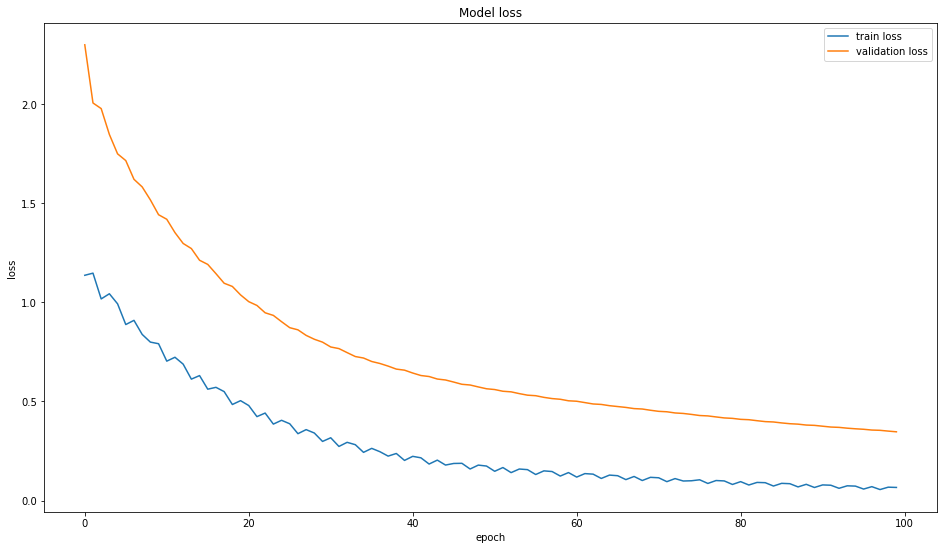

In [45]:
plt.figure(figsize=(16,9))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train loss', 'validation loss'])
plt.show()

In [46]:
df.columns

Index(['Open', 'High', 'Low', 'Close', 'Volume', 'Pre_Close', 'H-L', '0-C',
       'SMA_7', 'rsi_7', 'EMA_7'],
      dtype='object')

In [47]:

data_val = X_scaler.fit_transform(df[['Open','High','Low', 'Volume']].tail(10))
val_rescaled = data_val.reshape(1, data_val.shape[0], data_val.shape[1])
pred=cnn_model.predict(val_rescaled)
pred_Inverse = Y_scaler.inverse_transform(pred)
pred_Inverse

1/1 [==============================] - 0s 138ms/step


array([[0.12444641, 0.12617096, 0.1251061 , 0.12588522, 0.12654838,
        0.12700856, 0.12798175, 0.12851858, 0.1284772 , 0.12878442]],
      dtype=float32)

In [48]:
def timeseries_evaluation_metrics_func(y_true, y_pred):
    def mean_absolute_percentage_error(y_true, y_pred): 
        y_true, y_pred = np.array(y_true), np.array(y_pred)
        return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

    print('Evaluation metric results:-')
    print(f'MSE is : {metrics.mean_squared_error(y_true, y_pred)}')
    print(f'MAE is : {metrics.mean_absolute_error(y_true, y_pred)}')
    print(f'RMSE is : {np.sqrt(metrics.mean_squared_error(y_true, y_pred))}')
    print(f'MAPE is : {mean_absolute_percentage_error(y_true, y_pred)}')


In [49]:
validate = (df[['Close']].tail(10))
timeseries_evaluation_metrics_func(validate['Close'],pred_Inverse[0])

Evaluation metric results:-
MSE is : 4.237245641381571
MAE is : 2.0568219425842282
RMSE is : 2.0584571021475213
MAPE is : 94.17995679867876


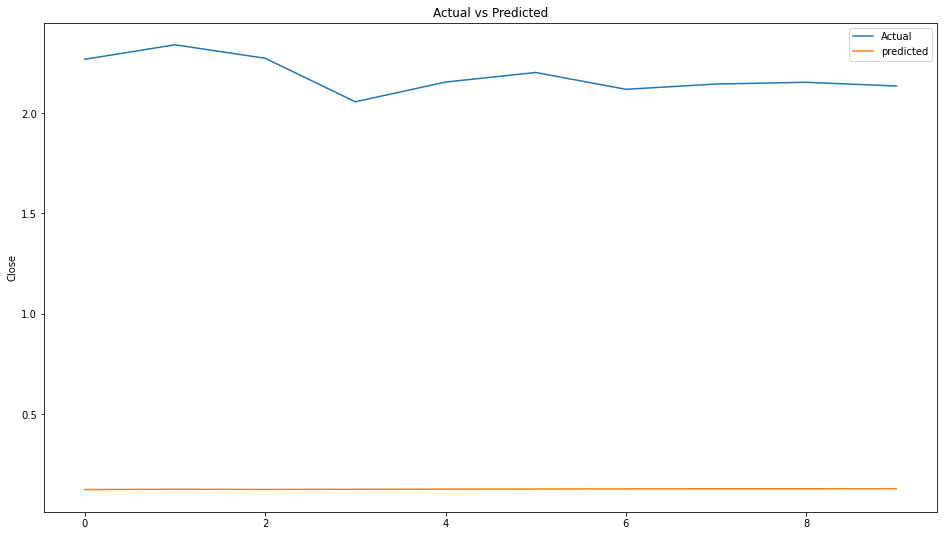

In [50]:
plt.figure(figsize=(16,9))
plt.plot( list(validate['Close']))
plt.plot( list(pred_Inverse[0]))
plt.title("Actual vs Predicted")
plt.ylabel("Close")
plt.legend(('Actual','predicted'))
plt.show()